In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from hyperopt import hp, fmin, tpe, Trials, space_eval, STATUS_OK
from data_process.data_transform_processor import DataTransformProcessor
from models.model_flow import ModelFlow
from models.nn_models.dnn import DNN
from lightgbm import LGBMRegressor
from sklearn.linear_model import ElasticNet
from models.tree_models.lgbm import LGBM
from models.backtest import BackTest
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


# Prepare data

In [3]:
df_all = pd.read_csv('/Users/shuyangdu/Desktop/ZillowChallenge/data/df_merged.csv')

# Data Transform Processor

In [3]:
data_processor_tree = DataTransformProcessor(use_scale=False, use_pca=False, use_dummy=False)

## Data preprocess

In [4]:
X_all = data_processor_tree.pre_process(df_all)
y_all = df_all['logerror'].values

# LightGBM

In [5]:
params = {
    'max_bin': 80,
    'learning_rate': 0.0116,
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'feature_fraction': 0.94,
    'bagging_fraction': 0.85,
    'bagging_freq': 80,
    'num_leaves': 110,
    'lambda_l2': 86.9,
    'n_estimators': 450,
}

In [6]:
model_lgbm = LGBM(
    categorical_feature = data_processor_tree.categorical_col_idx,
    **params
)

In [7]:
X_all_p = data_processor_tree.fit_transform(X_all)

In [8]:
model_lgbm.fit(X_all_p, y_all)

In [9]:
df_feature_importance = pd.DataFrame(
    model_lgbm.model.feature_importances_, 
    index=data_processor_tree.categorical_cols+data_processor_tree.numerical_cols
)

In [10]:
df_feature_importance.sort_values(0, ascending=False, inplace=True)

# Feature Importance

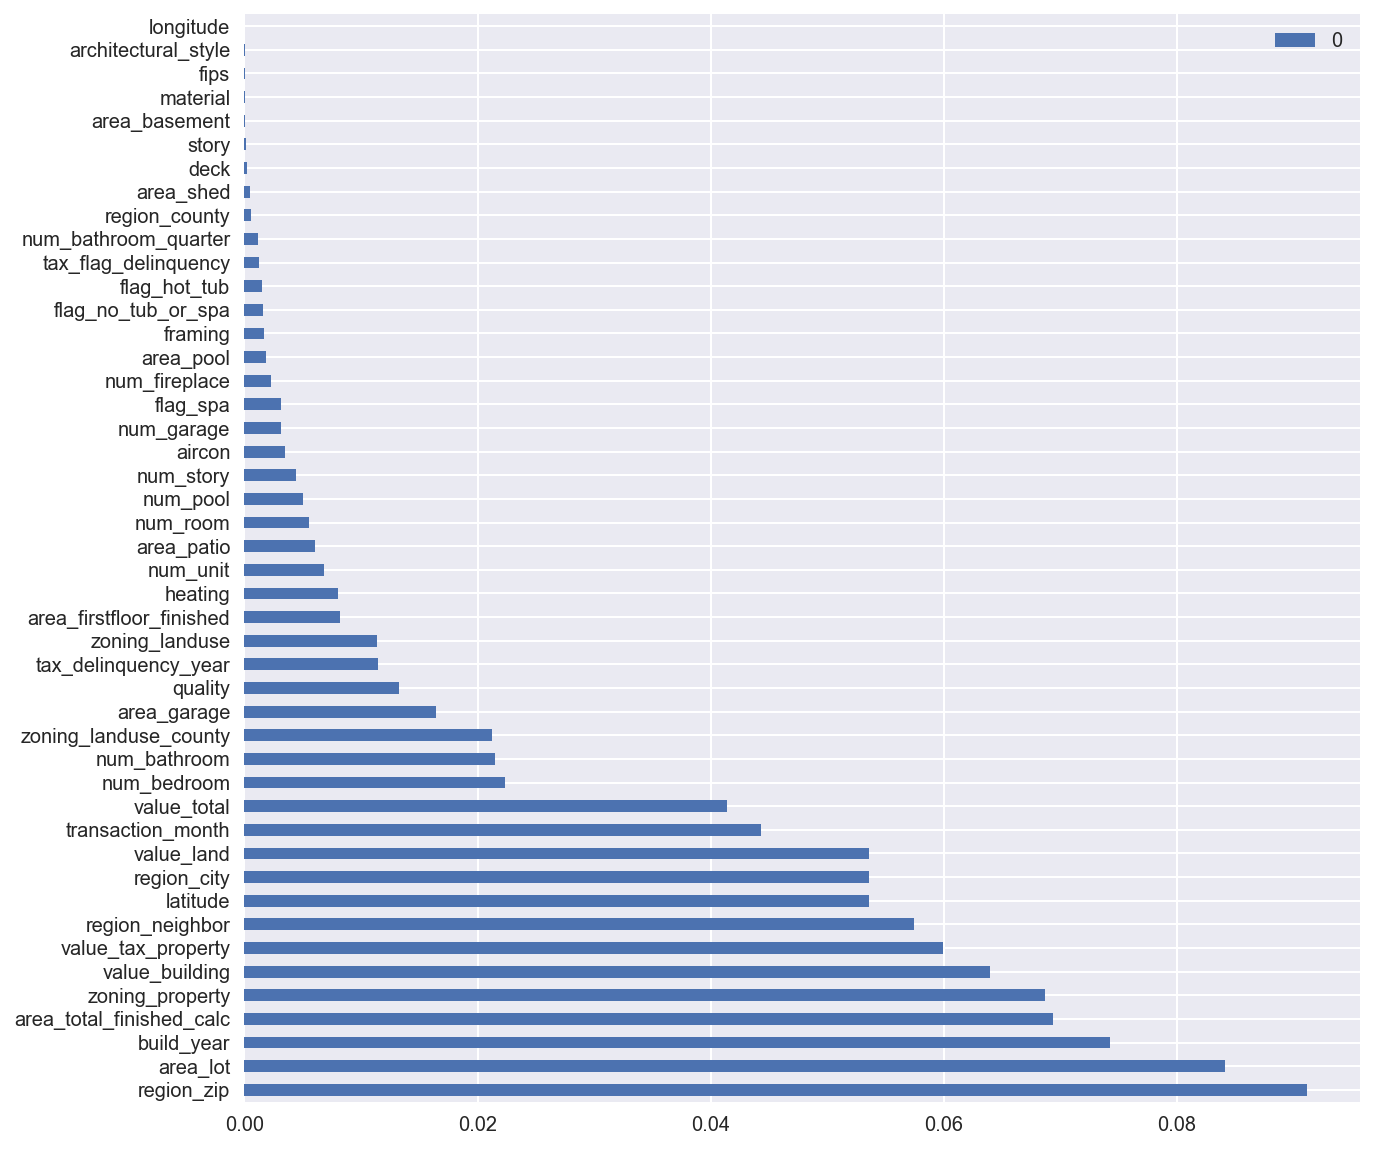

In [11]:
df_feature_importance.plot(kind='barh', figsize=(10, 10))

# Delete redundant features

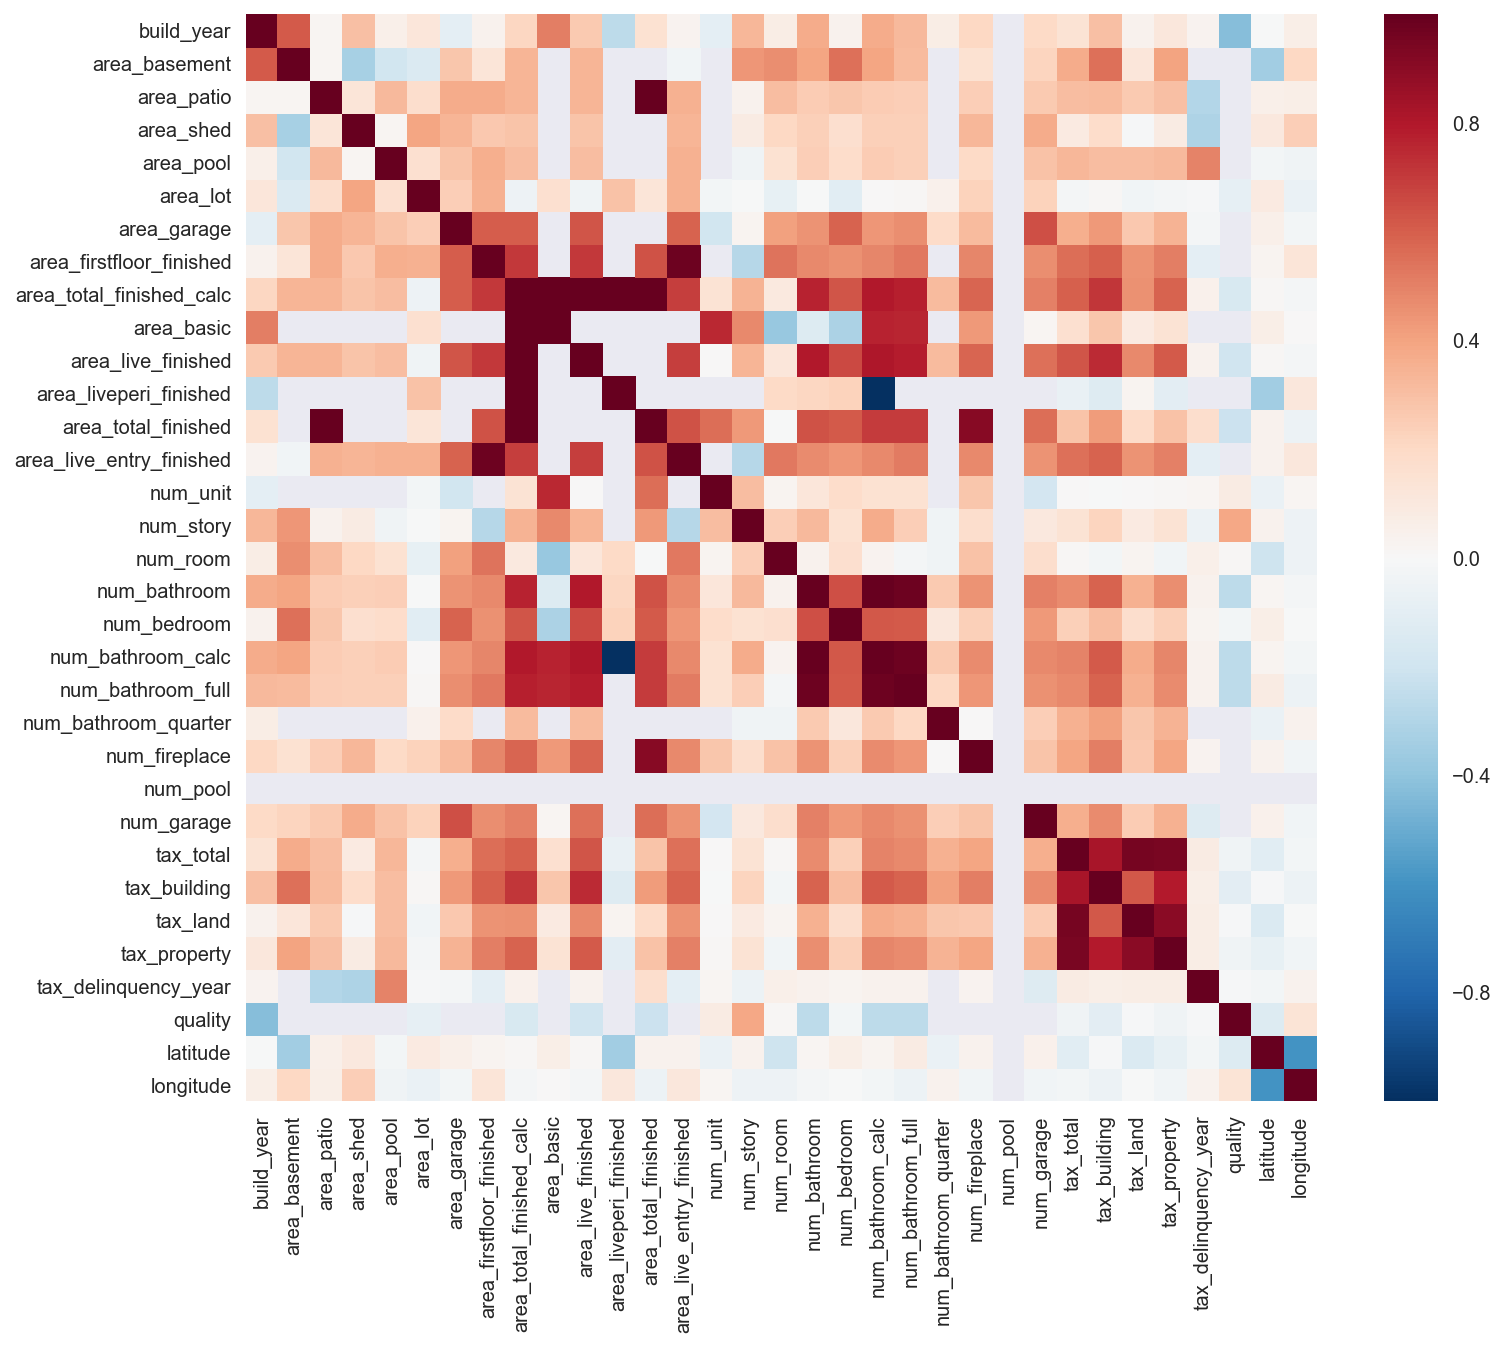

In [60]:
plt.figure(figsize=(12,10))
sns.heatmap(data=df_all[DataTransformProcessor.numerical_cols].corr())